<a href="https://colab.research.google.com/github/minhhung250302/TrinhMinhHungUTE/blob/main/projectend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu

/content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 588 images belonging to 8 classes.


In [5]:
training_set.class_indices

{'Congchieng': 0,
 'Dandoan': 1,
 'Dannhi_danco': 2,
 'Dantiba': 3,
 'Dantranhvietnam': 4,
 'Khen': 5,
 'Saotruc': 6,
 'danda': 7}

In [6]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu/Val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 103 images belonging to 8 classes.


In [7]:
validation.class_indices

{'Congchieng': 0,
 'Dandoan': 1,
 'Dannhi_danco': 2,
 'Dantiba': 3,
 'Dantranhvietnam': 4,
 'Khen': 5,
 'Saotruc': 6,
 'danda': 7}

In [9]:

model= Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=30,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/30
19/19 [==============================] - 390s 20s/step - loss: 3.3133 - accuracy: 0.1701 - val_loss: 2.0750 - val_accuracy: 0.1165
Epoch 2/30
19/19 [==============================] - 14s 762ms/step - loss: 2.0590 - accuracy: 0.2024 - val_loss: 2.0543 - val_accuracy: 0.1748
Epoch 3/30
19/19 [==============================] - 13s 698ms/step - loss: 1.9906 - accuracy: 0.2058 - val_loss: 1.9584 - val_accuracy: 0.2136
Epoch 4/30
19/19 [==============================] - 13s 675ms/step - loss: 1.8883 - accuracy: 0.2823 - val_loss: 1.8672 - val_accuracy: 0.3010
Epoch 5/30
19/19 [==============================] - 13s 697ms/step - loss: 1.7732 - accuracy: 0.3639 - val_loss: 1.9965 - val_accuracy: 0.2913
Epoch 6/30
19/19 [==============================] - 13s 700ms/step - loss: 1.7230 - accuracy: 0.3827 - val_loss: 1.7699 - val_accuracy: 0.3592
Epoch 7/30
19/19 [==============================] - 13s 703ms/step - loss: 1.5090 - accuracy: 0.4796 - val_loss: 1.5696 - val_accuracy: 0.3689


In [11]:
Score=model.evaluate(training_set,verbose=0)
print('Kiểm tra sai  ', Score[0])
print('Kiểm tra chính xác  ', Score[1])

Kiểm tra sai   0.1678995043039322
Kiểm tra chính xác   0.9455782175064087


In [12]:
model.save("projectcuoiki.h5")

In [19]:
model_CNN=load_model('projectcuoiki.h5') #ANN với hình ảnh đưa vào xử lí, CNN với sử dụng kho ảnh test

1/1 [==============================] - 0s 28ms/step
Khèn 


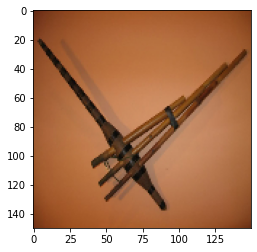

In [16]:
img=load_img('/728.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Cồng Chiêng'
if round(result[0][1])==1:
  prediction='Đàn Đoản '
if round(result[0][2])==1:
  prediction='Đàn Nhị (Đàn cò) '
if round(result[0][3])==1:
  prediction='Đàn tì bà '
if round(result[0][4])==1:
  prediction='Đàn Tranh Việt NamNam'
if round(result[0][5])==1:
  prediction='Khèn '
if round(result[0][6])==1:
  prediction='Sáo '
if round(result[0][7])==1:
  prediction='Đàn Đá'
print(prediction)

1/1 [==============================] - 0s 80ms/step
Đàn Tranh 


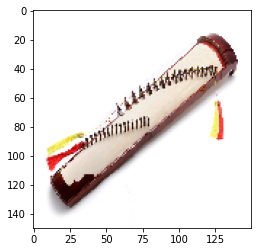

1/1 [==============================] - 0s 15ms/step
Đàn Tranh 


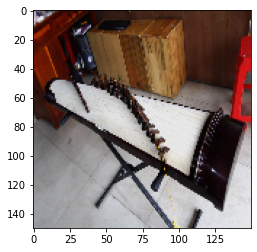

1/1 [==============================] - 0s 22ms/step
Đàn Tranh 


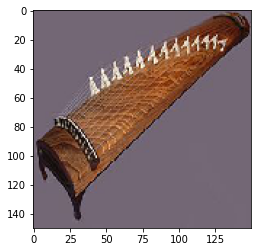

1/1 [==============================] - 0s 15ms/step
Đàn Tranh 


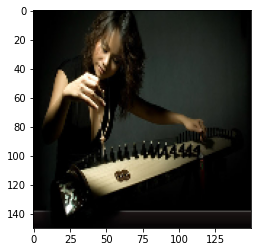

1/1 [==============================] - 0s 16ms/step
Đàn Tranh 


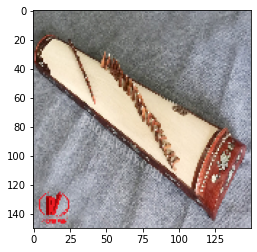

1/1 [==============================] - 0s 15ms/step
Đàn Tranh 


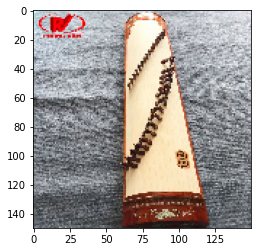

1/1 [==============================] - 0s 15ms/step
Đàn Tranh 


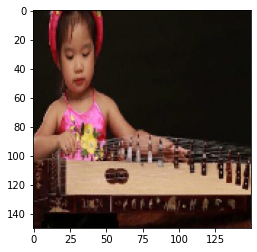

1/1 [==============================] - 0s 19ms/step
Đàn Tranh 


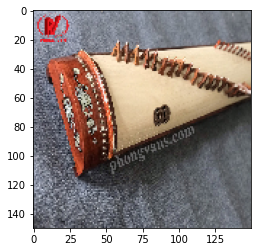

1/1 [==============================] - 0s 15ms/step
Đàn Tranh 


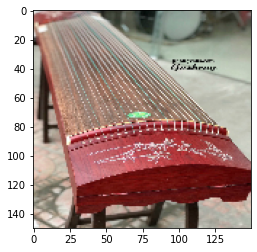

1/1 [==============================] - 0s 15ms/step
Sáo Trúc


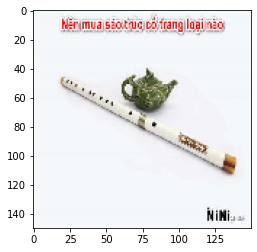

1/1 [==============================] - 0s 19ms/step
Sáo Trúc


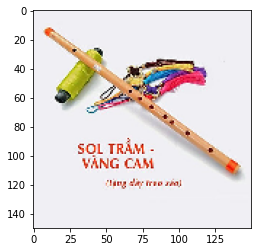

1/1 [==============================] - 0s 17ms/step
Sáo Trúc


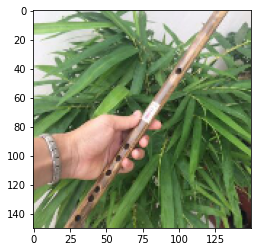

1/1 [==============================] - 0s 16ms/step
Sáo Trúc


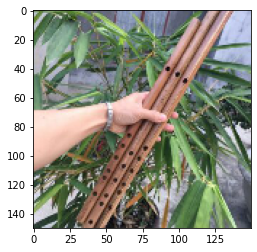

1/1 [==============================] - 0s 17ms/step
Sáo Trúc


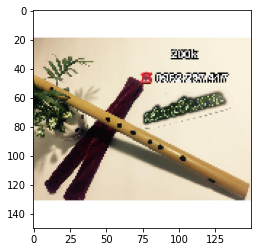

1/1 [==============================] - 0s 15ms/step
Sáo Trúc


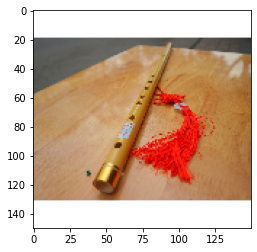

1/1 [==============================] - 0s 18ms/step
Sáo Trúc


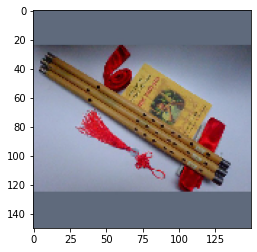

1/1 [==============================] - 0s 18ms/step
Khèn 


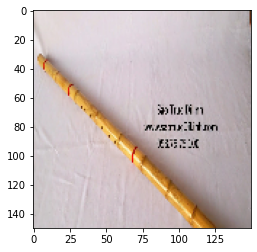

1/1 [==============================] - 0s 22ms/step
Đàn tì bà 


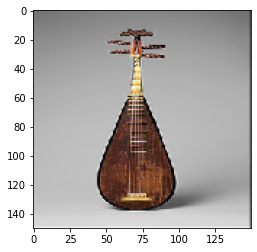

1/1 [==============================] - 0s 17ms/step
Đàn tì bà 


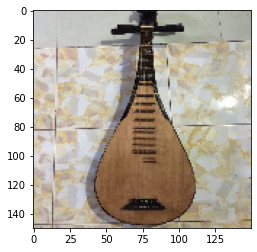

1/1 [==============================] - 0s 19ms/step
Đàn tì bà 


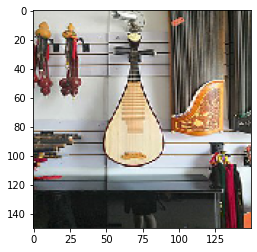

1/1 [==============================] - 0s 16ms/step
Đàn tì bà 


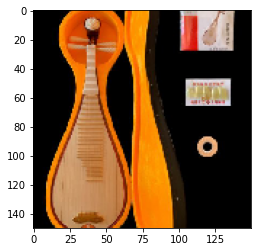

1/1 [==============================] - 0s 21ms/step
Đàn tì bà 


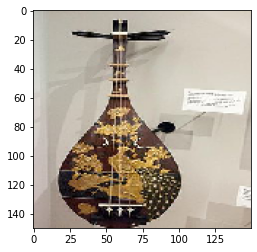

1/1 [==============================] - 0s 16ms/step
Đàn tì bà 


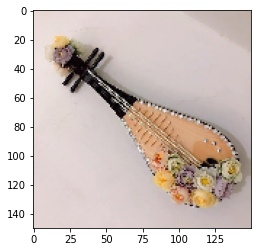

1/1 [==============================] - 0s 15ms/step
Đàn tì bà 


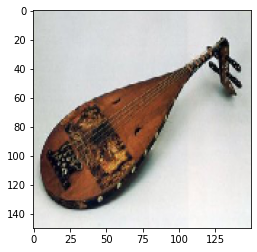

1/1 [==============================] - 0s 20ms/step
Đàn tì bà 


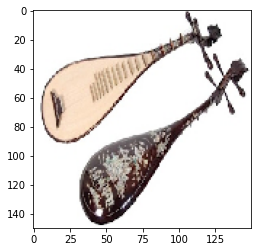

1/1 [==============================] - 0s 16ms/step
Đàn tì bà 


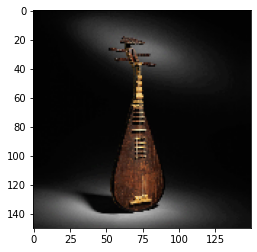

1/1 [==============================] - 0s 20ms/step
Cồng Chiêng 


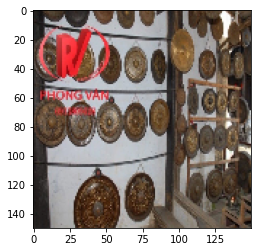

1/1 [==============================] - 0s 16ms/step
Cồng Chiêng 


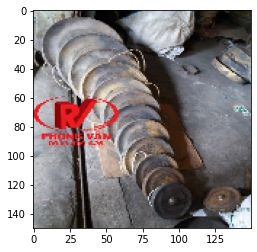

1/1 [==============================] - 0s 16ms/step
Cồng Chiêng 


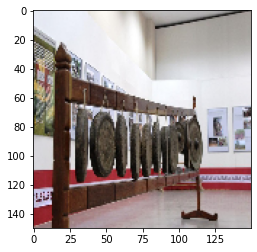

1/1 [==============================] - 0s 16ms/step
Cồng Chiêng 


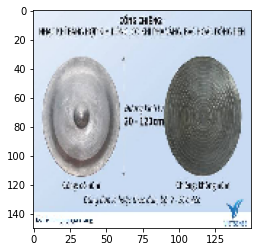

1/1 [==============================] - 0s 16ms/step
Cồng Chiêng 


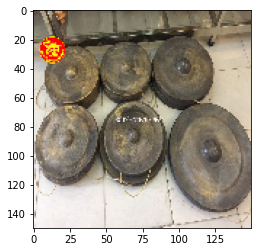

1/1 [==============================] - 0s 16ms/step
Cồng Chiêng 


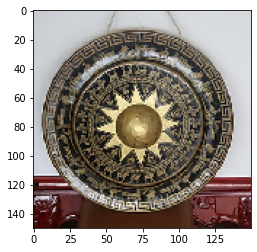

1/1 [==============================] - 0s 16ms/step
Cồng Chiêng 


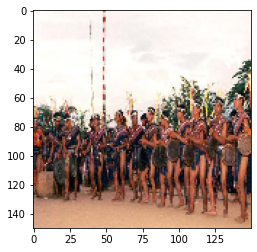

1/1 [==============================] - 0s 17ms/step
Cồng Chiêng 


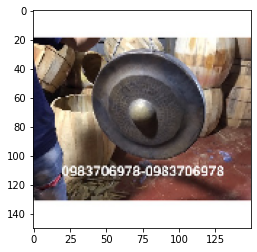

1/1 [==============================] - 0s 17ms/step
Cồng Chiêng 


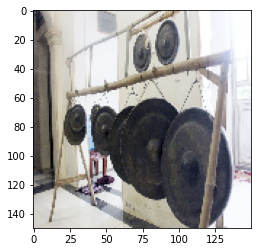

1/1 [==============================] - 0s 18ms/step
Cồng Chiêng 


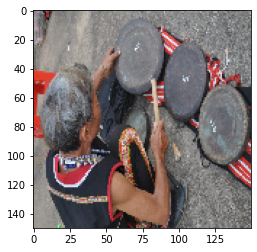

1/1 [==============================] - 0s 16ms/step
Cồng Chiêng 


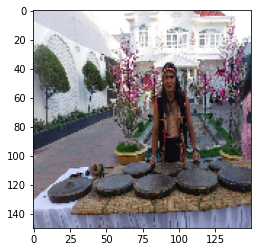

1/1 [==============================] - 0s 17ms/step
Cồng Chiêng 


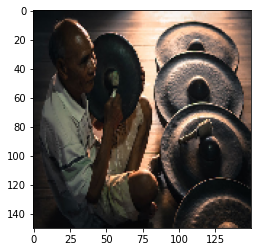

1/1 [==============================] - 0s 16ms/step
Khèn 


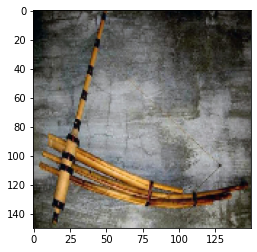

1/1 [==============================] - 0s 16ms/step
Khèn 


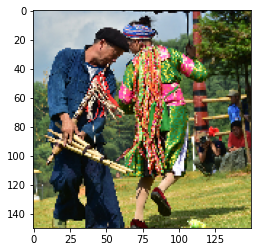

1/1 [==============================] - 0s 20ms/step
Sáo Trúc


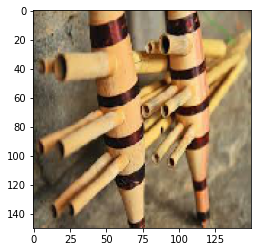

1/1 [==============================] - 0s 16ms/step
Khèn 


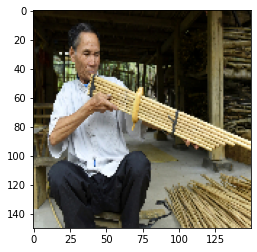

1/1 [==============================] - 0s 18ms/step
Khèn 


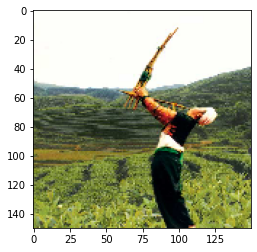

1/1 [==============================] - 0s 16ms/step
Khèn 


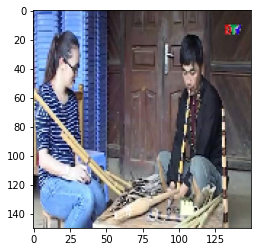

1/1 [==============================] - 0s 19ms/step
Khèn 


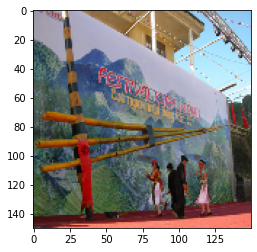

1/1 [==============================] - 0s 33ms/step
Khèn 


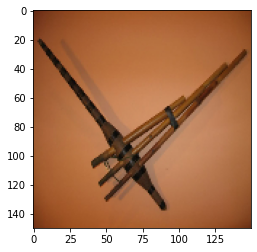

1/1 [==============================] - 0s 27ms/step
Khèn 


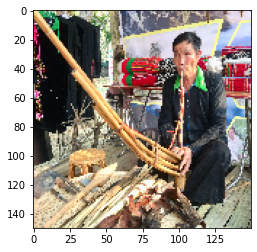

1/1 [==============================] - 0s 18ms/step
Khèn 


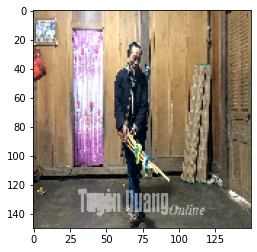

1/1 [==============================] - 0s 23ms/step
Khèn 


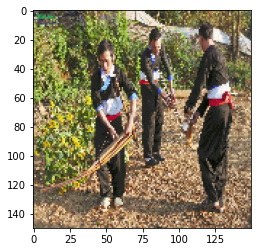

1/1 [==============================] - 0s 23ms/step
Khèn 


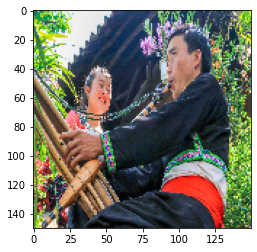

1/1 [==============================] - 0s 17ms/step
Khèn 


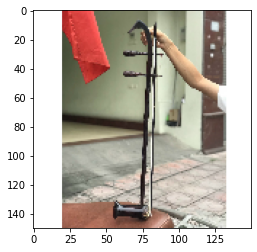

1/1 [==============================] - 0s 16ms/step
Đàn Nhị ( Đàn cò )


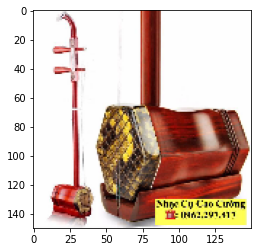

1/1 [==============================] - 0s 16ms/step
Đàn Nhị ( Đàn cò )


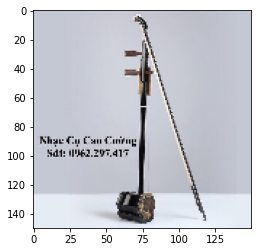

1/1 [==============================] - 0s 16ms/step
Đàn Nhị ( Đàn cò )


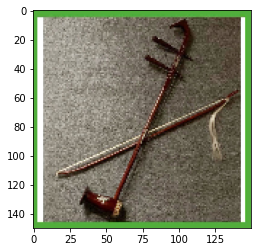

1/1 [==============================] - 0s 17ms/step
Đàn Nhị ( Đàn cò )


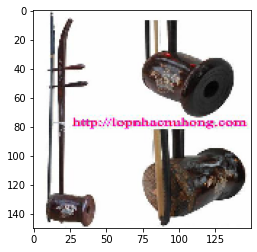

1/1 [==============================] - 0s 16ms/step
Đàn Nhị ( Đàn cò )


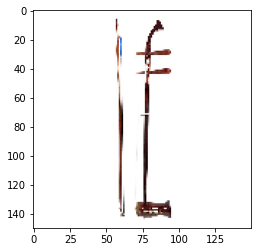

1/1 [==============================] - 0s 16ms/step
Đàn Nhị ( Đàn cò )


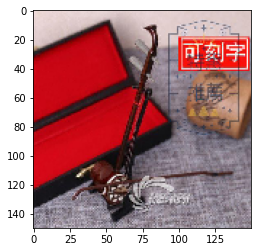

1/1 [==============================] - 0s 16ms/step
Đàn Nhị ( Đàn cò )


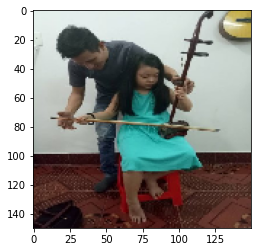

1/1 [==============================] - 0s 16ms/step
Đàn đá


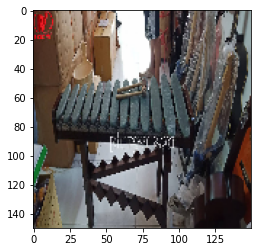

1/1 [==============================] - 0s 16ms/step
Đàn đá


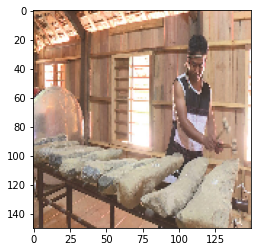

1/1 [==============================] - 0s 15ms/step
Đàn đá


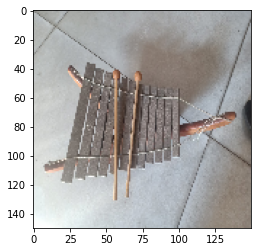

1/1 [==============================] - 0s 16ms/step
Đàn đá


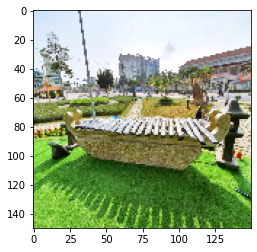

1/1 [==============================] - 0s 16ms/step
Đàn đá


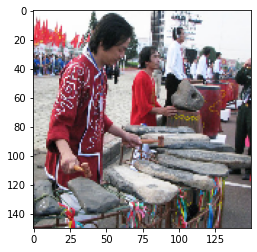

1/1 [==============================] - 0s 16ms/step
Đàn đá


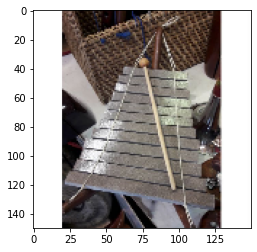

1/1 [==============================] - 0s 16ms/step
Đàn đá


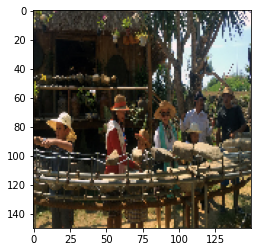

1/1 [==============================] - 0s 15ms/step
Đàn đá


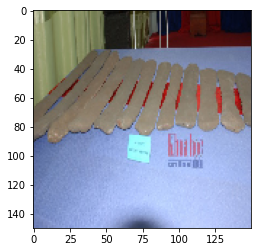

1/1 [==============================] - 0s 16ms/step
 Đàn Đoản 


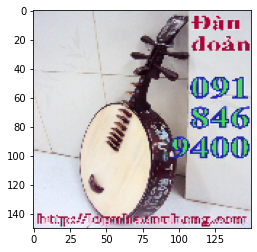

1/1 [==============================] - 0s 16ms/step
 Đàn Đoản 


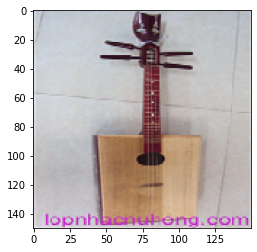

1/1 [==============================] - 0s 16ms/step
 Đàn Đoản 


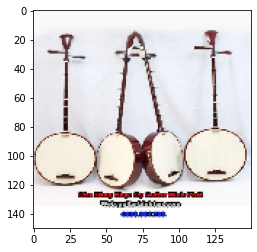

1/1 [==============================] - 0s 16ms/step
 Đàn Đoản 


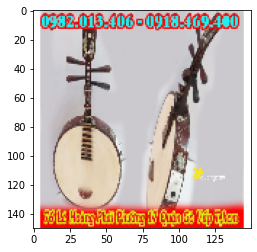

1/1 [==============================] - 0s 17ms/step
 Đàn Đoản 


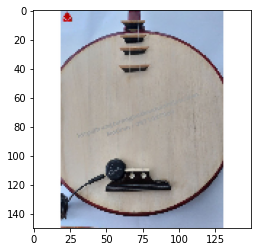

1/1 [==============================] - 0s 22ms/step
 Đàn Đoản 


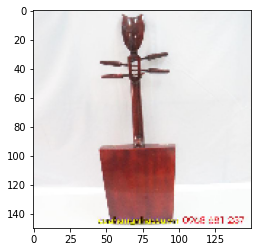

1/1 [==============================] - 0s 26ms/step
Cồng Chiêng 


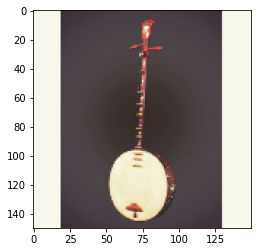

1/1 [==============================] - 0s 18ms/step
Đàn Nhị ( Đàn cò )


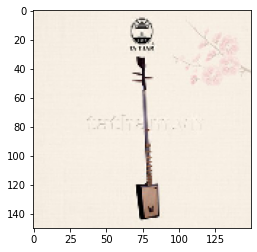

In [20]:
test="/content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu/Test"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Cồng Chiêng '
  if round(result[0][1])==1:
    prediction=' Đàn Đoản '
  if round(result[0][2])==1:
    prediction='Đàn Nhị ( Đàn cò )'
  if round(result[0][3])==1:
    prediction='Đàn tì bà '
  if round(result[0][4])==1:
    prediction='Đàn Tranh '
  if round(result[0][5])==1:
    prediction='Khèn '
  if round(result[0][6])==1:
    prediction='Sáo Trúc'
  if round(result[0][7])==1:
    prediction='Đàn đá'
  
  print(prediction)
  plt.show()